In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_excel('Data_Train.xlsx')
print(df)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun

In [6]:
df.shape

(10683, 11)

our Data set Contains 10,683 data with 11 data columns

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Only our output price is integer,remaining all are categorical so need to do encoding

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

two data variables having the null values

In [10]:
#dropping NA Values:
df1 = df.dropna()
df1.shape

(10682, 11)

1. Above data set date of journey given as full date format for my convinient i split into day,month,and year
2. Dep_Time split into hours and minutes


In [11]:

df1['Day'],df1['Month'],df1['Year'] = df1['Date_of_Journey'].str.split('/',3).str

In [12]:

df1['Dep_Hr'],df1['Dep_Min'] = df1['Dep_Time'].str.split(':',2).str

In [13]:
df1['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [14]:
df1['Arrival_Time'],_ = df['Arrival_Time'].str.split(' ',1).str

In [15]:
df1['Arr_Hr'],df1['Arr_Min'] = df1['Arrival_Time'].str.split(':',2).str

In [16]:
df1['Duration'] = df1['Duration'].str.replace('h ',':').str.replace('m','')

In [17]:
df1['Duration_Hr'],df1['Duration_Min'] = df1['Duration'].str.split(':',2).str


In [18]:
df1['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

As per Total Stops unique values are non-stop,2 stops,1 stop,3 stops,4 stops

In [19]:
df1['Total_Stops'],_ = df1['Total_Stops'].str.split(' stops').str
df1['Total_Stops'],_ = df1['Total_Stops'].str.split(' stop').str

In [20]:
df1['Total_Stops'] = df1['Total_Stops'].apply(lambda x: 0 if 'non-stop' in x else x)

In [22]:
df1['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [23]:
df1['Additional_Info'] = df1['Additional_Info'].str.replace('No info','No Info')

In [24]:
df1['Price'].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [31]:
df = pd.read_csv('Cleaned.csv')
df.shape

(10682, 20)

now after clean dataset now we have 20 columns and 10682 rows

In [33]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,0,No Info,3897,24,3,2019,22,20,1,10,2,50.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No Info,7662,1,5,2019,5,50,13,15,7,25.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No Info,13882,9,6,2019,9,25,4,25,19h,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1,No Info,6218,12,5,2019,18,5,23,30,5,25.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1,No Info,13302,1,3,2019,16,50,21,35,4,45.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  object 
 8   Total_Stops      10682 non-null  int64  
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  int64  
 11  Day              10682 non-null  int64  
 12  Month            10682 non-null  int64  
 13  Year             10682 non-null  int64  
 14  Dep_Hr           10682 non-null  int64  
 15  Dep_Min          10682 non-null  int64  
 16  Arr_Hr           10682 non-null  int64  
 17  Arr_Min     

In [35]:
df.describe()

,Total_Stops,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,9650.00000
mean,0.824190,9087.214567,13.509081,4.708575,2019.0,12.491013,24.409287,13.349186,24.690601,31.35544
std,0.675229,4611.548810,8.479363,1.164408,0.0,5.748820,18.767801,6.859317,16.506808,14.93004
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,5.00000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,20.00000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,30.00000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,45.00000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,55.00000


<AxesSubplot:>

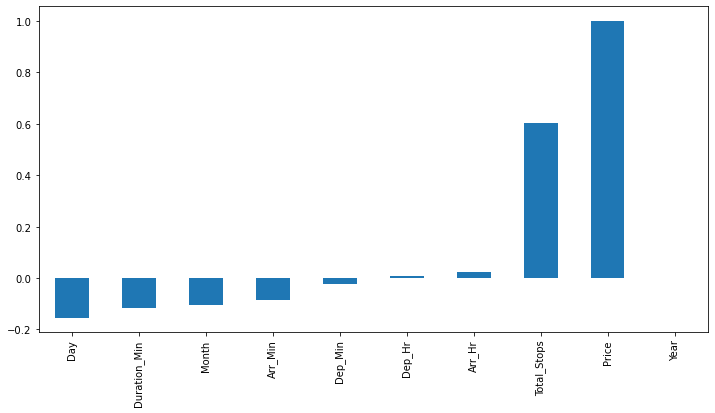

In [36]:
plt.figure(figsize=(12,6))
df.corr()['Price'].sort_values().plot(kind='bar')

As per this Day,Duration_Min,Month,And Arr_Min are Negetively Corelated and remaining are positively corelated

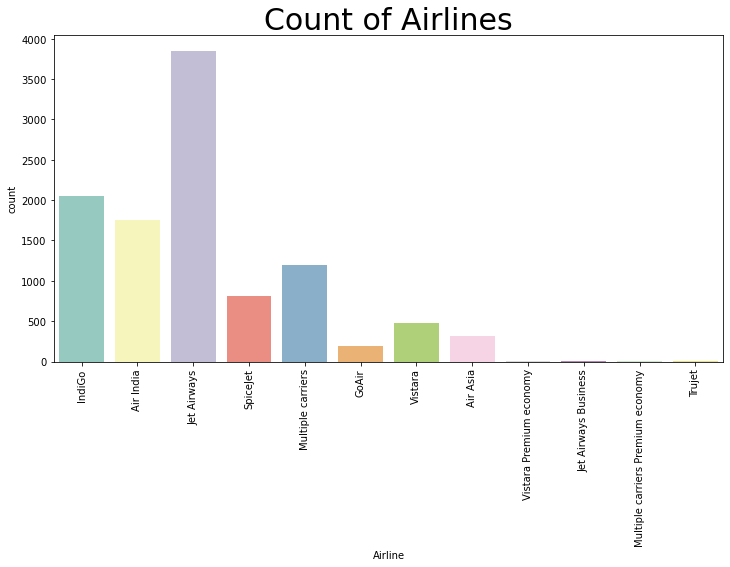

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(df['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()


Jet airways has the highest airline count 

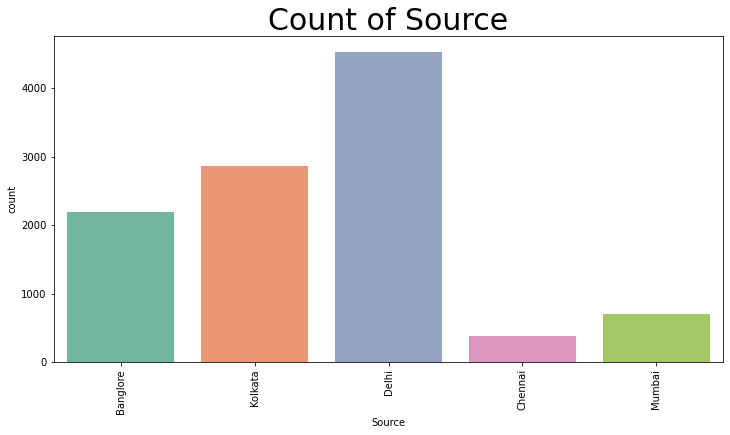

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(df['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

Source are more in Delhi and least in chennai 

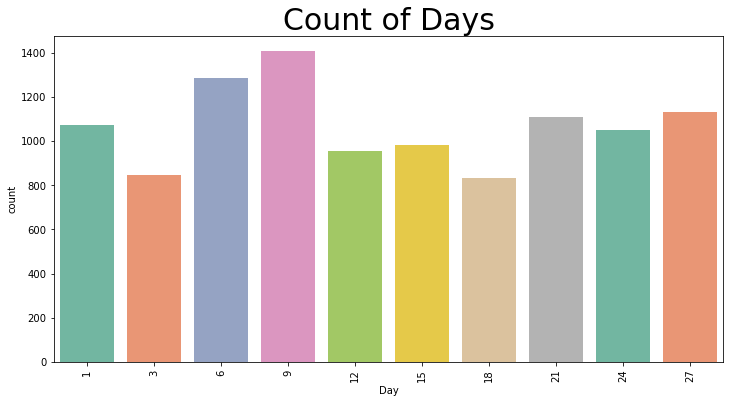

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(df['Day'], palette='Set2')
plt.title('Count of Days', size=30)
plt.xticks(rotation=90)
plt.show()

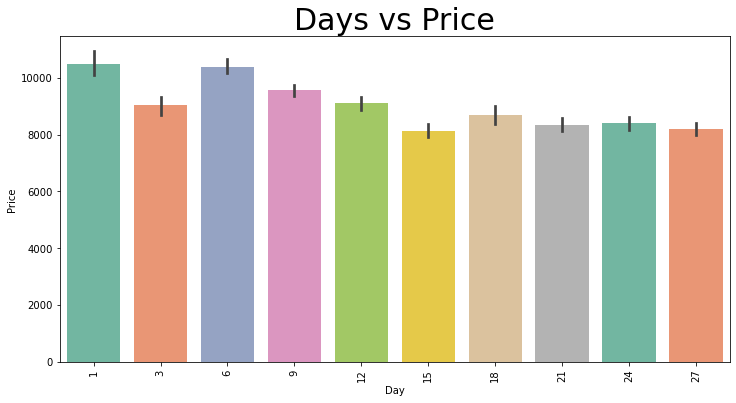

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(df['Day'], df['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

Price is more in starting of the month and least in mid of the month

In [42]:
df['Month'] = df['Month'].map({
    1:'JAN',
    2:'FEB',
    3:'MAR',
    4:'APR',
    5:'MAY',
    6:'JUN',
    7:'JUL',
    8:'AUG',
    9:'SEP',
    10:'OCT',
    11:'NOV',
    12:'DEC'
})

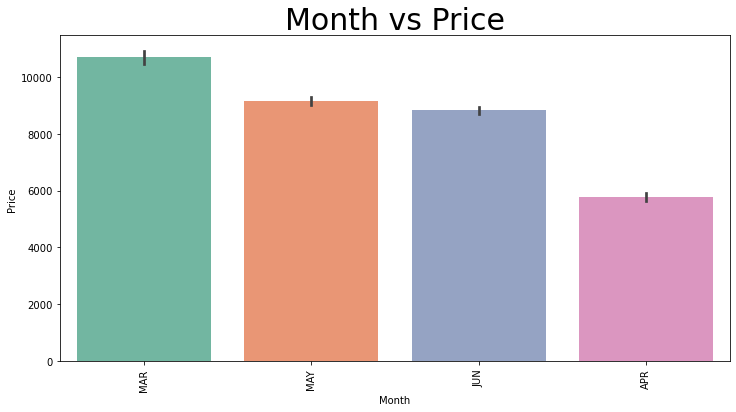

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(df['Month'], df['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)
plt.show()


IN March Month the prices are more and least in april

In [44]:
df['Duration_Hr'],_ = df['Duration_Hr'].str.split('h',1).str

In [45]:
df['Duration_Hr'] = df['Duration_Hr'].astype(int)

In [46]:
df['Duration_bool'] = (df['Duration_Hr']*60)+df['Duration_Min']

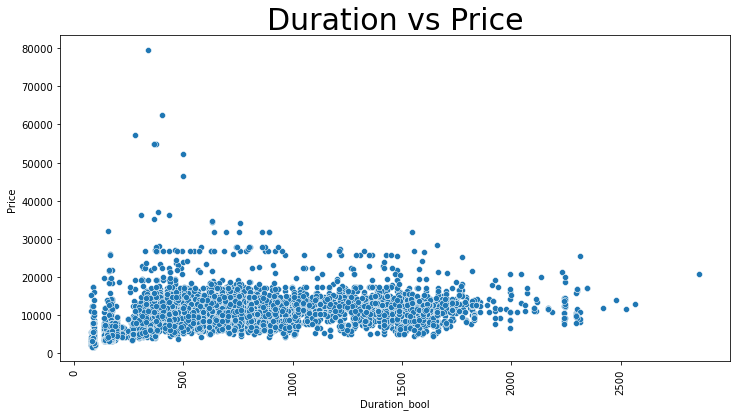

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot(df['Duration_bool'], df['Price'], palette='Set2')
plt.title('Duration vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

As price is increasing the duration is decreasing,As we conclude that if stops are less flight rate increases

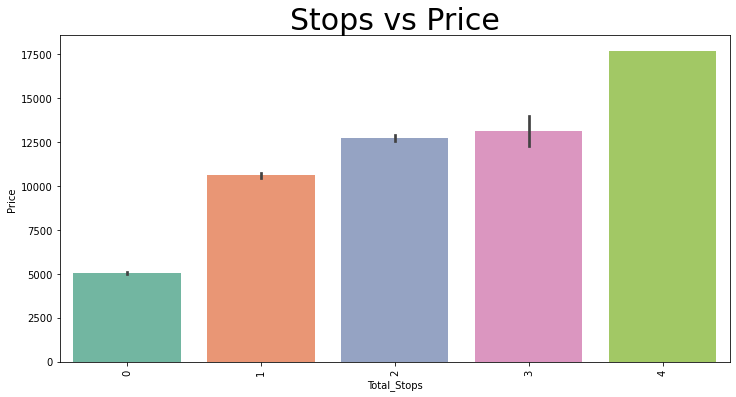

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(df['Total_Stops'], df['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

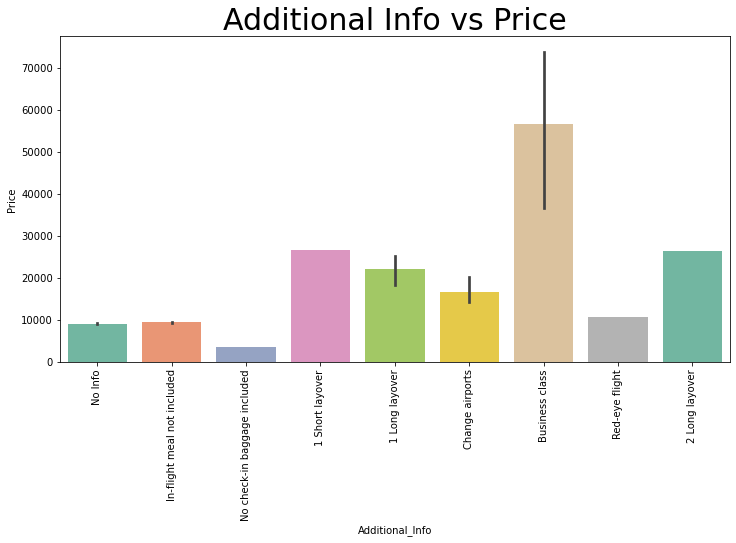

In [49]:
plt.figure(figsize=(12,6))
sns.barplot(df['Additional_Info'], df['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

Business class Price is more

In [50]:
ncol=["Duration_bool"]          
for i in ncol:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    df = df.drop(df[df.loc[:,i] <= min].index)
    df = df.drop(df[df.loc[:,i] >= max].index)

In [54]:
df2= df.dropna()

In [55]:
df2.shape

(9650, 21)

In [56]:
loss_percent=(10682-9650)/10682*100
print(loss_percent)

9.661112151282532


In [57]:
df2.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Year', 'Dep_Hr', 'Dep_Min',
       'Arr_Hr', 'Arr_Min', 'Duration_Hr', 'Duration_Min', 'Duration_bool'],
      dtype='object')

In [58]:
df1 = df2[['Airline', 'Source', 'Destination', 'Total_Stops',
         'Additional_Info', 'Price', 'Day', 'Month', 'Duration_bool']]
df1.shape

(9650, 9)

In [59]:
df1 = df1.rename(columns={'Duration_bool': 'Duration'})

In [60]:
df1.isnull().any().any()

False

In [61]:
df1['Month'] = df1['Month'].map({
    'JAN':1,
    'FEB':2,
    'MAR':3,
    'APR':4,
    'MAY':5,
    'JUN':6,
    'JUL':7,
    'AUG':8,
    'SEP':9,
    'OCT':10,
    'NOV':11,
    'DEC':12
})

In [62]:
df1['Additional_Info'] = df1['Additional_Info'].map({
    'No Info':0, 
    'In-flight meal not included':1,
    'No check-in baggage included':1,
    '1 Short layover':3,
    '1 Long layover':4,
    'Change airports':5,
    'Business class':6,
    'Red-eye flight':7,
    '2 Long layover':8
})

In [63]:
dummies = pd.get_dummies(df1[['Airline', 'Source', 'Destination']])

In [64]:

df2 = pd.concat([df1,dummies], axis=1)
df2.shape

(9650, 32)

In [65]:
df2 = df2.drop(['Airline', 'Source', 'Destination'], axis=1)
df2.shape

(9650, 29)

In [66]:
df2.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Day', 'Month', 'Duration',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [67]:
df2.info

<bound method DataFrame.info of        Total_Stops  Additional_Info  Price  Day  Month  Duration  \
0                0                0   3897   24      3     170.0   
1                2                0   7662    1      5     445.0   
3                1                0   6218   12      5     325.0   
4                1                0  13302    1      3     285.0   
5                0                0   3873   24      6     145.0   
...            ...              ...    ...  ...    ...       ...   
10676            0                1   3257   21      5     160.0   
10677            0                0   4107    9      4     150.0   
10678            0                0   4145   27      4     155.0   
10680            0                0  12648    1      3     160.0   
10681            2                0  11753    9      5     500.0   

       Airline_Air Asia  Airline_Air India  Airline_GoAir  Airline_IndiGo  \
0                     0                  0              0               1 

In [68]:
df2['Additional_Info'].unique()

array([0, 1, 3, 4, 5, 6, 7, 8], dtype=int64)

In [69]:
X = df2.drop('Price', axis=1)
y = df2['Price']

In [71]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6755, 28), (2895, 28), (6755,), (2895,))

In [73]:

models = [['LinearRegression : ', LinearRegression()],
          ['ElasticNet :', ElasticNet()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['SVR : ', SVR()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()]]

In [74]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

LinearRegression :  2779.0455708889144
ElasticNet : 3379.6819876610443
Lasso :  2759.449381312224
Ridge :  2710.8476127741037
KNeighborsRegressor :  3240.4589432221046
DecisionTreeRegressor :  2073.31444625601
RandomForestRegressor :  1661.343553381788
SVR :  4246.460099935076
AdaBoostRegressor :  3111.7656196102844
GradientBoostingRegressor :  1905.1631516529953


In [76]:
algorithms = {
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']
        }
    }
}

In [77]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [78]:
final = pd.DataFrame(score, columns=['model', 'score', 'params'])
final

,model,score,params
0,RandomForestRegressor,0.855648,"{'n_estimators': 2100, 'min_samples_split': 2,..."
1,GradientBoostingRegressor,0.865434,"{'n_estimators': 500, 'learning_rate': 0.3, 'c..."


In [80]:
final['params'][1]

{'n_estimators': 500, 'learning_rate': 0.3, 'criterion': 'friedman_mse'}

In [81]:
regressor = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.3, criterion = 'friedman_mse')
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_test, prediction))))


RMSE : 1645.8624269816423


In [82]:
regressor.score(X_train, y_train), regressor.score(X_test, y_test)

(0.917514528615212, 0.8695701407615268)

In [83]:
prediction[0]

4742.384163142354

In [84]:
df2['Price'][0]

3897

In [85]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 959.8303690059392
MSE: 2708863.128549902
RMSE: 1645.8624269816423


In [86]:
import pickle
file = open('final_model.pkl', 'wb')
pickle.dump(regressor, file)